In this file we will look at the output of finding the rates of different binaries after having run the slurm job (on the loss mass COMPAS output)

I will look at both executes of rates of all DCOS+WD and just WD

I will also look at the separations of the mass combinations of the WD+WD systems that merge within a hubble time

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from useful_fncs import tgw,WD_BINARY_BOOLS

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [63]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_NS.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [64]:
list(Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [65]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [66]:
display(rates_info['SEED'])
display(rates_info['DCOmask'])
print(sum(rates_info['DCOmask'][()])) # this is summing the trues that are BNS that merged within a hubble time (same as number of SEEDs in this rate info H5 file)
display(rates_info['merger_rate']) #80 redshift bins 
display(rates_info['redshifts'])
print(rates_info['redshifts'][()])

<HDF5 dataset "SEED": shape (19,), type "<u8">

<HDF5 dataset "DCOmask": shape (360,), type "|b1">

19


<HDF5 dataset "merger_rate": shape (19, 80), type "<f8">

<HDF5 dataset "redshifts": shape (80,), type "<f8">

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [67]:
# reading in the HDF5 file
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_LowMass_1.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [68]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_data = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_data[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [69]:
dco_mask = rates_info['DCOmask'][()]
merging_NSNS = DCO_data[dco_mask]

In [70]:
print(np.shape(rates_info['merger_rate'][:,0]))

(19,)


In [71]:
merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_532773/4163823339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [72]:
merging_NSNS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),merger_rate_z0
15,1,4.748315,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,0.000323,0,1,1,0,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.0,0.000855
23,1,3.162000,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,0.000511,0,1,1,0,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.0,0.004354
29,1,34.065425,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,0.001198,0,1,1,0,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.0,0.057433
60,1,31.483034,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,0.004774,0,1,1,0,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.0,1.155829
75,1,85.827476,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,0.000840,0,1,1,0,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.0,0.020778
86,1,1563.689829,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,0.007143,0,1,1,0,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.0,2.550545
153,1,2658.001673,0.583687,0,b'5 ',b'8 ',1.775825,1.613424,1,0.012691,0,1,1,0,519339,0.024207,13,13,14.905412,0.000018,-1.393037,0.0,0.0,5.226306
174,1,2.456000,0.571036,0,b'2-8 ',b'4-8 ',1.260127,1.373905,1,0.000221,0,1,1,0,130780,0.003428,13,13,37.736467,0.000127,-1.747179,0.0,0.0,0.000197
191,1,50.351583,0.156808,0,b'2 ',b'4-8 ',1.260129,1.277584,1,0.006075,0,1,1,0,197130,0.005136,13,13,41.552101,0.000129,-1.262143,0.0,0.0,1.675444
192,1,288.911579,0.511055,0,b'2 ',b'4-8 ',1.260030,1.349386,1,0.016219,0,1,1,0,198500,0.010346,13,13,29.946002,0.000030,-1.355765,0.0,0.0,4.595955


In [73]:
# this is the rate at redhsif zero (check expectations with Ligo paper 2023 - see on their website)
print(sum(merging_NSNS['merger_rate_z0']))

34.758742306206145


Text(0, 0.5, 'dR/dM')

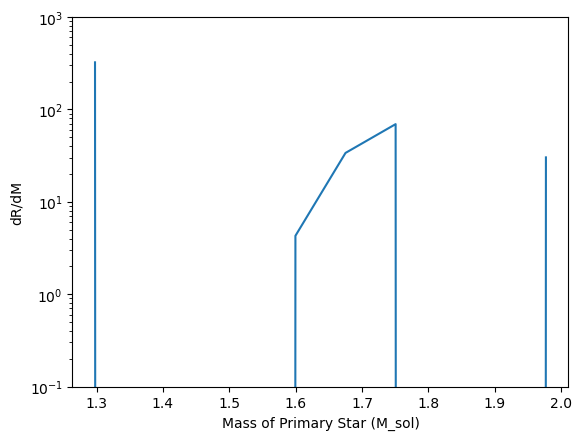

In [74]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM")

#### Doing rates analysis on the AIS WD hdf5 output

In [2]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_WD_UPDATE.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [3]:
Data_rates.keys()

<KeysViewHDF5 ['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']>

In [4]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [5]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [6]:
# reading in the HDF5 file
pathToweights_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_SM_3.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [7]:
Data_weights.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>

In [8]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [9]:
# gathering the seeds from the rates.h5 file
dco_mask = rates_info['DCOmask'][()]
merging_all_WD = DCO_WD_data[dco_mask]

In [10]:
print(np.shape(rates_info['merger_rate'][:,0]))

(1205,)


In [11]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_3829514/2127216249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [12]:
merging_all_WD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight,merger_rate_z0
500,2,0.004316,0.0,1,"b""b'5 '""","b""b'3 '""",0.593913,0.246345,1,0.001883,...,1,NaN,NaN,13,0.043346,11,10,2203.361047,6.633484,1.775575
501,2,0.005958,0.0,1,"b""b'5 '""","b""b'3 '""",0.804574,0.263241,1,0.000173,...,1,NaN,NaN,282,0.054719,11,10,1661.616350,9.812540,0.001202
502,1,0.000176,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.245348,0.270718,1,0.000152,...,1,NaN,NaN,390,0.014152,10,10,1987.560727,10.000000,0.000843
503,1,0.001535,0.0,1,"b""b'2 '""","b""b'3 '""",0.517893,0.215305,1,0.003247,...,1,NaN,NaN,678,0.030230,11,10,2808.980120,9.999974,9.074343
504,1,0.009975,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.211159,0.285340,1,0.000270,...,1,NaN,NaN,682,0.037536,10,10,6553.614307,10.000000,0.058916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2,0.012863,0.0,1,"b""b'3 '""","b""b'3 '""",0.470100,0.245102,1,0.000381,...,1,NaN,NaN,990696,0.051532,10,10,3876.053724,1.411546,0.007063
1701,2,0.001339,0.0,1,"b""b'3 '""","b""b'3 '""",0.390258,0.197062,1,0.001889,...,1,NaN,NaN,994640,0.025186,10,10,4344.323222,1.385454,0.599439
1702,2,0.007254,0.0,1,"b""b'3 '""","b""b'3 '""",0.456693,0.237171,1,0.000294,...,1,NaN,NaN,995736,0.043641,10,10,3659.690788,1.135102,0.002176
1703,2,0.003109,0.0,1,"b""b'3 '""","b""b'3 '""",0.419092,0.177682,1,0.002185,...,1,NaN,NaN,996451,0.030964,10,10,9220.525957,4.504378,13.288757


Text(0.5, 1.0, 'Mass Distribution of the Primary Star')

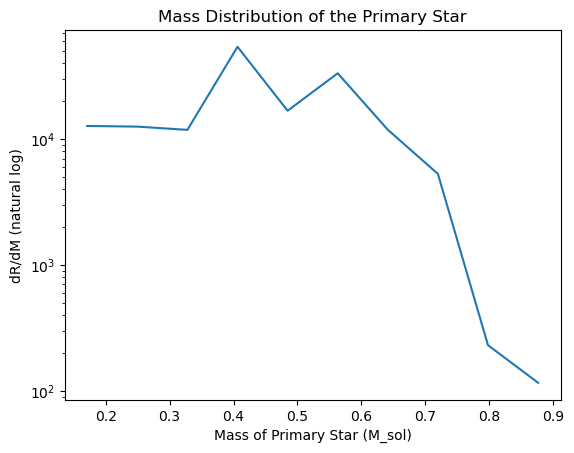

In [55]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("Mass Distribution of the Primary Star")

Text(0.5, 1.0, 'Separation Distribution')

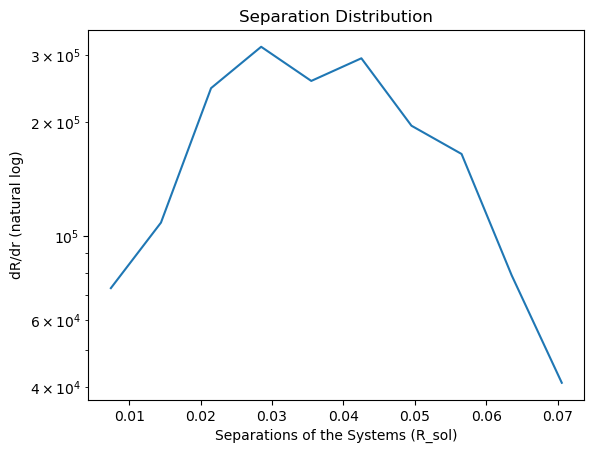

In [56]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['SemiMajorAxis@DCO'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Separations of the Systems (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e5)
plt.ylabel("dR/dr (natural log)")
plt.title("Separation Distribution")

Let's look at the stellar types and if there are any places where there are oxygen/neon white dwarfs

In [15]:
ONeWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==12,merging_all_WD['Stellar_Type(2)']==12)
sum(ONeWD_bool)

0

It seems liek there are no systems that merged within a hubble time that are oxygen neon white dwarfs

In [16]:
OtherWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==10,merging_all_WD['Stellar_Type(2)']==11)
sum(OtherWD_bool)

801

Text(0, 0.5, 'Stellar Type of Secondary Star')

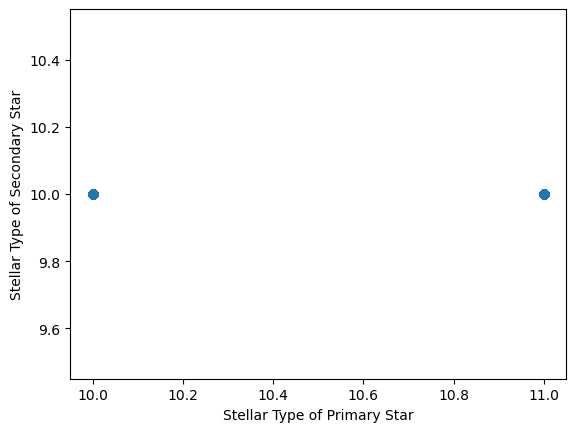

In [17]:
plt.scatter(merging_all_WD['Stellar_Type(1)'],merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

#### Let's look at different mass combinations of the WD+WD

In [18]:
# let's gather the system parameters group 

SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [19]:
# let's take the seeds from the DCO_mask
# gathering the seeds from the rates.h5 file

dco_seed_mask = rates_info['SEED'][()]
overlap_seeds_bool = np.in1d(SP_WD_data['SEED'],dco_seed_mask)

SP_merging_all_WD = SP_WD_data[overlap_seeds_bool]

In [20]:
SP_merging_all_WD

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
13,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,11,10,1,1,0.0,2203.361047,0,1.0,6.633484
282,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,11,10,1,1,0.0,1661.616350,0,1.0,9.812540
390,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,1987.560727,0,1.0,10.000000
678,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,11,10,1,1,0.0,2808.980120,0,1.0,9.999974
682,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,6553.614307,0,1.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,3876.053724,0,1.0,1.411546
994640,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,4344.323222,0,1.0,1.385454
995736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,3659.690788,0,1.0,1.135102
996451,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,30.0,10,10,1,1,0.0,9220.525957,0,1.0,4.504378


Let's add the rates info to this table as well

In [21]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
SP_merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_3829514/2194420057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [22]:
SP_merging_all_WD

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,...,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
13,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,11,10,1,1,0.0,2203.361047,0,1.0,6.633484,1.775575
282,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,11,10,1,1,0.0,1661.616350,0,1.0,9.812540,0.001202
390,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,10,10,1,1,0.0,1987.560727,0,1.0,10.000000,0.000843
678,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,11,10,1,1,0.0,2808.980120,0,1.0,9.999974,9.074343
682,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,...,10,10,1,1,0.0,6553.614307,0,1.0,10.000000,0.058916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,10,10,1,1,0.0,3876.053724,0,1.0,1.411546,0.007063
994640,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,10,10,1,1,0.0,4344.323222,0,1.0,1.385454,0.599439
995736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,10,10,1,1,0.0,3659.690788,0,1.0,1.135102,0.002176
996451,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,...,10,10,1,1,0.0,9220.525957,0,1.0,4.504378,13.288757


In [48]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_weights['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

b'Msol'
b'Rsol'
b'Myr'


Let's separate these systems between HeWD and COWD

Text(0, 0.5, 'Stellar Type of Secondary Star')

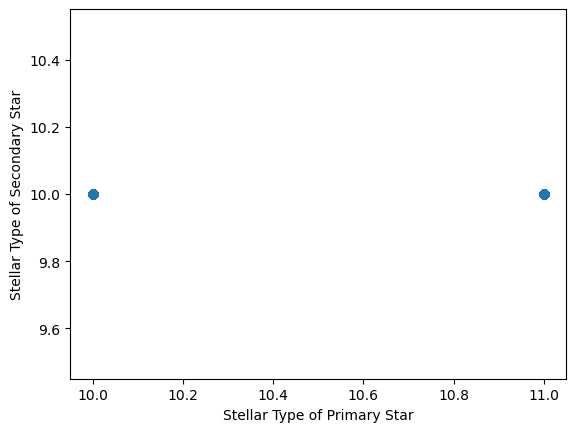

In [24]:
plt.scatter(SP_merging_all_WD['Stellar_Type(1)'],SP_merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

Let's select for stellar types that are just HeWD+HeWD and COWD+COWD

In [25]:
hewd_bool = np.logical_or(np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==10,SP_merging_all_WD['Stellar_Type(2)']==10),np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==10,SP_merging_all_WD['Stellar_Type(2)']==11))
HeWD_SYS = SP_merging_all_WD[hewd_bool]

cowd_bool = np.logical_or(np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==11,SP_merging_all_WD['Stellar_Type(2)']==11),np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==11,SP_merging_all_WD['Stellar_Type(2)']==10))
COWD_SYS = SP_merging_all_WD[cowd_bool]

#checking if these bools take care of all of the systems
print(sum(hewd_bool)+sum(cowd_bool))

1205


In [26]:
pd.set_option('display.max_columns', None)
display(HeWD_SYS)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
390,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.245348,0.270718,1.864383,0.879989,1,0,0.000152,0.000152,0.0,0.0,0,1,390,0.638525,0.563484,1.285136,6.110702,-0.103642,0.144511,0.677543,5.528398,0.014152,0.016368,265.0,265.0,30.0,30.0,10,10,1,1,0.0,1987.560727,0,1.0,10.000000,0.000843
682,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.211159,0.285340,1.409574,0.735179,1,0,0.000270,0.000270,0.0,0.0,0,1,682,0.699443,0.380188,6.209512,2.013284,-0.792668,0.129883,0.825178,2.059652,0.037536,0.023954,265.0,265.0,30.0,30.0,10,10,1,1,0.0,6553.614307,0,1.0,10.000000,0.058916
915,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.184580,0.268106,1.221688,0.634600,1,0,0.000299,0.000299,0.0,0.0,0,1,915,0.108761,0.865113,1.179598,1.487009,0.242225,0.031670,3.662896,2.001149,0.052590,0.021281,265.0,265.0,30.0,30.0,10,10,1,0,0.0,13462.413335,0,1.0,10.000000,0.000000
1048,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.138062,0.258495,1.339440,0.630440,1,0,0.001587,0.001587,0.0,0.0,0,1,1048,0.687423,0.545792,5.330663,1.890118,0.727027,0.644805,5.314129,6.199865,0.018651,0.013691,265.0,265.0,30.0,30.0,10,10,1,0,0.0,6234.216147,0,1.0,10.000000,5.168919
1421,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.421959,0.196230,1.198150,0.849729,1,0,0.002224,0.002224,0.0,0.0,0,1,1421,0.861838,0.127361,0.642538,1.558790,-0.445509,0.231342,2.516426,0.078553,0.055152,0.975362,265.0,265.0,30.0,30.0,10,10,1,1,0.0,12772.943874,0,1.0,9.827268,0.365737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.470100,0.245102,1.579281,1.147624,1,0,0.000381,0.000381,0.0,0.0,0,1,990696,0.522491,0.760319,2.324036,1.632675,0.649350,-0.239432,2.754680,0.610730,0.051532,0.781763,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3876.053724,0,1.0,1.411546,0.007063
994640,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.390258,0.197062,1.636905,1.143355,1,0,0.001889,0.001889,0.0,0.0,0,1,994640,0.340462,0.134833,4.885396,4.078910,-1.521185,0.107456,2.682743,1.331618,0.025186,0.625782,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4344.323222,0,1.0,1.385454,0.599439
995736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.456693,0.237171,1.535040,1.163256,1,0,0.000294,0.000294,0.0,0.0,0,1,995736,0.791869,0.453936,2.789666,0.552527,0.050858,-0.325226,1.544295,3.218876,0.043641,0.661934,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3659.690788,0,1.0,1.135102,0.002176
996451,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.419092,0.177682,1.409679,0.922890,1,0,0.002185,0.002185,0.0,0.0,0,1,996451,0.379445,0.895692,5.076869,0.161869,-0.821010,-1.224126,4.623775,4.818819,0.030964,0.904166,265.0,265.0,30.0,30.0,10,10,1,1,0.0,9220.525957,0,1.0,4.504378,13.288757


In [27]:
COWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
13,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.593913,0.246345,1.888582,1.430485,1,0,0.001883,0.001883,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,0.043346,1.194675,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2203.361047,0,1.0,6.633484,1.775575
282,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.804574,0.263241,2.559901,1.498617,1,0,0.000173,0.000173,0.0,0.0,0,1,282,0.101516,0.391722,0.295351,0.761335,-0.407165,-0.930712,0.193855,6.233391,0.054719,1.265116,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1661.616350,0,1.0,9.812540,0.001202
678,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'2 ',b'3 ',0.517893,0.215305,3.469111,1.239958,1,0,0.003247,0.003247,0.0,0.0,0,1,678,0.919455,0.550116,2.727400,4.401147,0.062821,0.528544,2.538474,0.421584,0.030230,0.048591,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2808.980120,0,1.0,9.999974,9.074343
711,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.638210,0.198955,2.167488,1.197108,1,0,0.002035,0.002035,0.0,0.0,0,1,711,0.710000,0.660724,2.587224,2.767146,-0.767199,-0.666701,3.813868,2.471222,0.038416,0.930553,265.0,265.0,30.0,30.0,11,10,1,1,0.0,3779.062967,0,1.0,9.214704,4.131883
1010,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'2 ',b'3 ',0.331033,0.212897,2.344319,0.798401,1,0,0.000225,0.000225,0.0,0.0,0,1,1010,0.815915,0.175592,4.015816,0.456824,-0.663957,0.995304,0.777768,2.627146,0.048055,0.044067,265.0,265.0,30.0,30.0,11,10,1,1,0.0,11816.371586,0,1.0,10.000000,4.061026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944418,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.579084,0.232560,1.528265,1.083216,1,0,0.000213,0.000213,0.0,0.0,0,1,944418,0.238410,0.668647,5.471470,5.466873,-0.333461,1.282005,4.238780,1.190504,0.060070,0.780991,265.0,265.0,30.0,30.0,11,10,1,1,0.0,4609.074981,0,1.0,0.873953,0.000816
953779,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.915582,0.228913,3.565775,1.311146,1,0,0.005326,0.005326,0.0,0.0,0,1,953779,0.172777,0.714893,5.195678,4.274409,-1.161936,1.002575,0.962415,2.101766,0.064779,1.676604,265.0,265.0,30.0,30.0,11,10,1,1,0.0,3416.993138,0,1.0,3.468357,7.862233
954893,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.565551,0.205625,1.789812,1.060316,1,0,0.003111,0.003111,0.0,0.0,0,1,954893,0.777136,0.131261,4.116896,1.337146,0.879286,-0.128978,4.203816,0.902159,0.051206,0.961902,265.0,265.0,30.0,30.0,11,10,1,1,0.0,6172.851753,0,1.0,5.169716,9.024545
963827,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.629256,0.223491,1.908642,1.290816,1,0,0.000626,0.000626,0.0,0.0,0,1,963827,0.516854,0.030780,2.095320,5.810841,-0.180908,-0.336442,4.292825,5.407402,0.041046,0.878345,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2673.819452,0,1.0,8.253728,0.135319


Let's look at a histogram of the masses for each setllar binary type

In [28]:
pratice_list = np.linspace(0,10,10)
print(pratice_list[1:])
print(pratice_list[:-1])

[ 1.11111111  2.22222222  3.33333333  4.44444444  5.55555556  6.66666667
  7.77777778  8.88888889 10.        ]
[0.         1.11111111 2.22222222 3.33333333 4.44444444 5.55555556
 6.66666667 7.77777778 8.88888889]


Text(0.5, 1.0, 'The Mass Spectrum of the Primary HeWD')

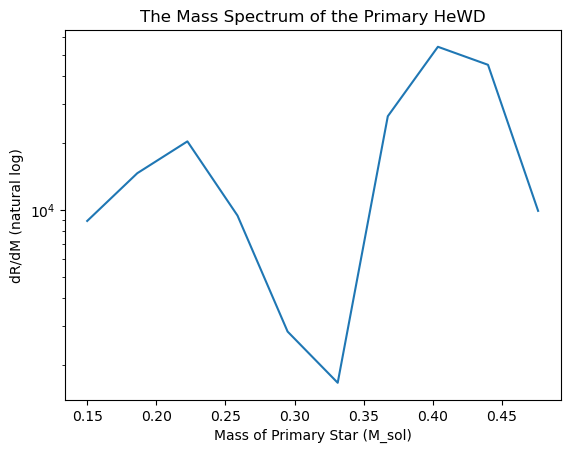

In [29]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(HeWD_SYS['Mass(1)'], weights=HeWD_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Primary HeWD")

For HeWD, let's separate the mass bins into masses below 0.32 M_sun and above 0.32 Msun

In [30]:
HeWD_SYS_LOWM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']<0.32]
HeWD_SYS_HIGHM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']>0.32]

Text(0.5, 1.0, 'The Mass Spectrum of the Primary COWD')

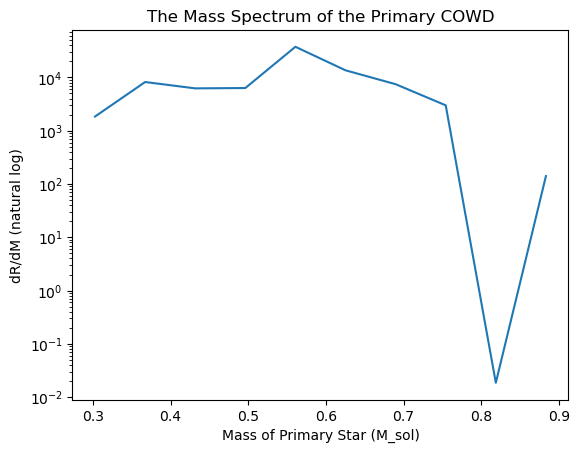

In [31]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(COWD_SYS['Mass(1)'], weights=COWD_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Primary COWD")

For COWD, let's separate the mass bins for below 0.8 M_sun and above 0.8 M_sun

In [32]:
COWD_SYS_LOWM = COWD_SYS.loc[COWD_SYS['Mass(1)']<0.8]
COWD_SYS_HIGHM = COWD_SYS.loc[COWD_SYS['Mass(1)']>0.8]

#### Within these bins let's look at what secondary mass is most common

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary HeWD (within M1<0.32)')

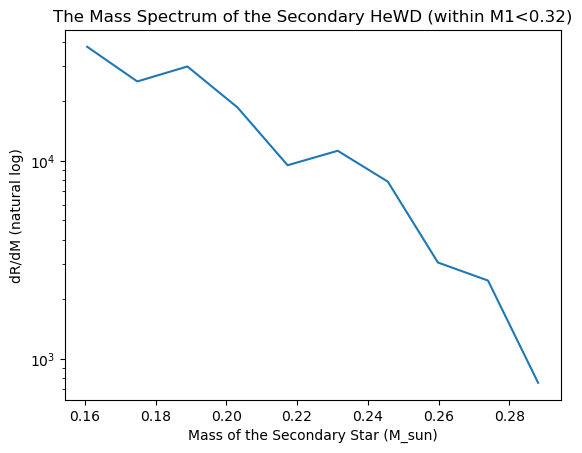

In [33]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_SYS_LOWM['Mass(2)'], weights=HeWD_SYS_LOWM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary HeWD (within M1<0.32)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary HeWD (within M1>0.32)')

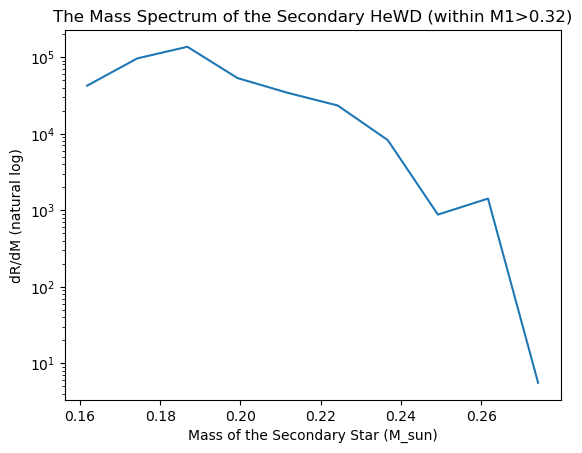

In [34]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_SYS_HIGHM['Mass(2)'], weights=HeWD_SYS_HIGHM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary HeWD (within M1>0.32)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary COWD (within M1<0.80)')

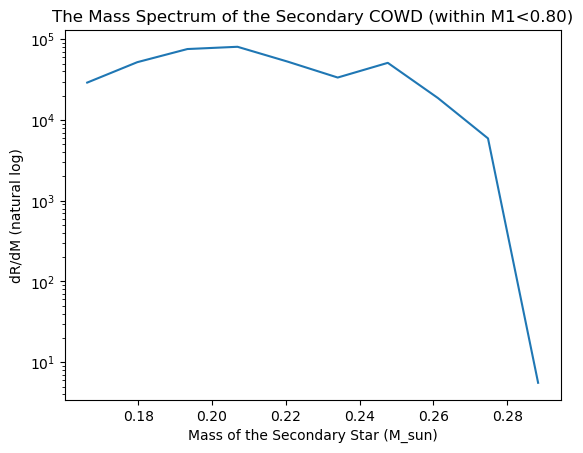

In [35]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_SYS_LOWM['Mass(2)'], weights=COWD_SYS_LOWM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary COWD (within M1<0.80)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary COWD (within M1>0.80)')

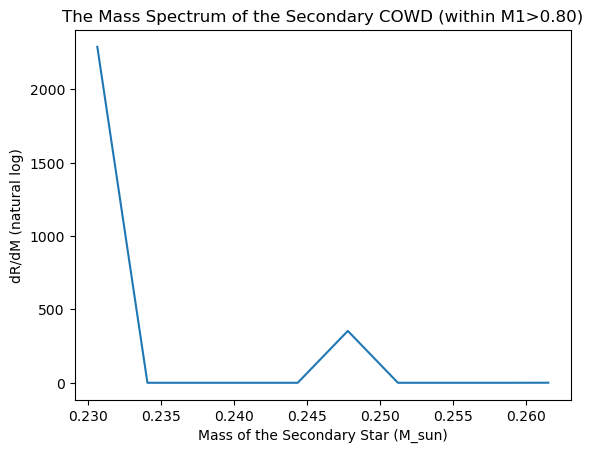

In [36]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_SYS_HIGHM['Mass(2)'], weights=COWD_SYS_HIGHM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary COWD (within M1>0.80)")

So the results seem like likely couples:

HeWD:
- Mass(1)<0.32 + Mass(2) ~ 0.2 or Mass(2) ~ 0.17
- Mass(1)>0.32 + Mass(2) ~ 0.19

COWD:
- Mass(1)<0.8 + Mass(2) ~ 0.20
- Mass(1)>0.8 + Mass(2) ~ 0.232

Let's slice the data even more to look at the separations that would be needed for these stars to lead to a GW merger

This will allow us to see what mass combinations produce systems that have a coalescence time less than Hubble time

In [37]:
# selecting the common secondary mass ranges for the HeWDs
HeWD_LOWM_SEP = HeWD_SYS_LOWM.loc[np.logical_and(HeWD_SYS_LOWM['Mass(2)']>=0.16,HeWD_SYS_LOWM['Mass(2)']<=0.179)]
HeWD_HIGHM_SEP = HeWD_SYS_HIGHM.loc[np.logical_and(HeWD_SYS_HIGHM['Mass(2)']>=0.16,HeWD_SYS_HIGHM['Mass(2)']<=0.19)]

# selecting the common secondary mass ranges for the COWDs
COWD_LOWM_SEP = COWD_SYS_LOWM.loc[np.logical_and(COWD_SYS_LOWM['Mass(2)']>=0.18,COWD_SYS_LOWM['Mass(2)']<=0.24)]
COWD_HIGHM_SEP = COWD_SYS_HIGHM.loc[np.logical_and(COWD_SYS_HIGHM['Mass(2)']>=0.230,COWD_SYS_HIGHM['Mass(2)']<=0.26)]



Text(0.5, 1.0, 'The Separation Distirbution of HeWD + WD (with M1<0.32 0.16<M2>0.179)')

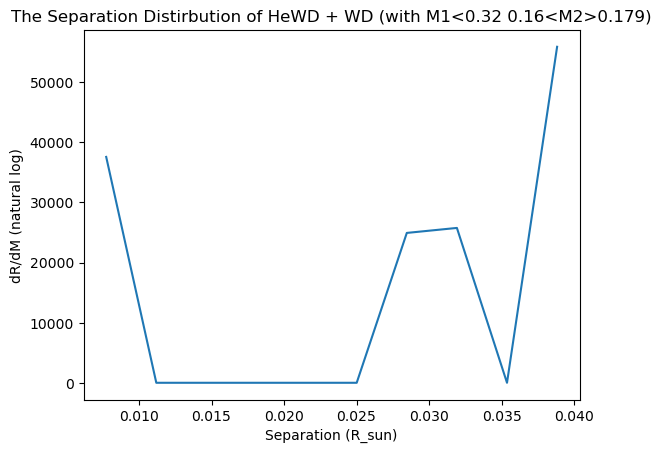

In [38]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_LOWM_SEP['SemiMajorAxis'], weights=HeWD_LOWM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of HeWD + WD (with M1<0.32 0.16<M2>0.179)")

Text(0.5, 1.0, 'The Separation Distirbution of HeWD + WD (with M1>0.32 0.16<M2>0.19)')

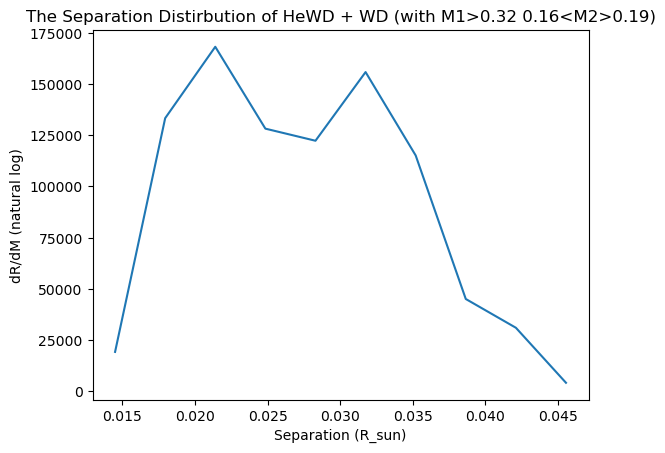

In [39]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_HIGHM_SEP['SemiMajorAxis'], weights=HeWD_HIGHM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of HeWD + WD (with M1>0.32 0.16<M2>0.19)")

Text(0.5, 1.0, 'The Separation Distirbution of COWD + WD (with M1<0.8 0.18<M2>0.24)')

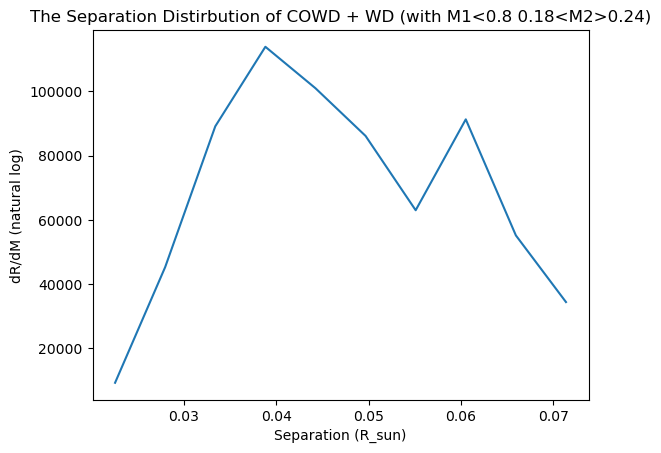

In [40]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_LOWM_SEP['SemiMajorAxis'], weights=COWD_LOWM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of COWD + WD (with M1<0.8 0.18<M2>0.24)")

Text(0.5, 1.0, 'The Separation Distirbution of COWD + WD (with M1>0.8 0.23<M2>0.232)')

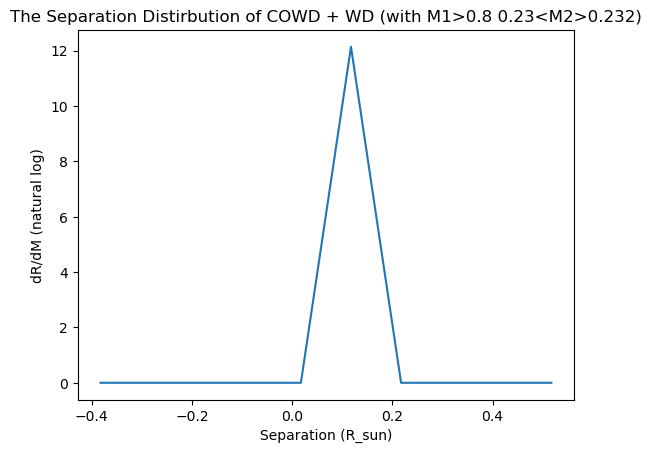

In [41]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_HIGHM_SEP['SemiMajorAxis'], weights=COWD_HIGHM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of COWD + WD (with M1>0.8 0.23<M2>0.232)")

Let's use the peak of these separations distirbutions to find what the coalescence times of the different cases are

In [43]:

def tgw(a,e,Mmoremass,Mlessmass,Data,key,parameter):

    """
    Calcualte the coalescence time (inspiral time)
    a = semi major axis (expected in AU or Rsun)
    e = eccentricity
    Mmoremass = mass of the more massive compact object (expected in solar masses!)
    Mlessmass = mass of the less massive compact object (expected in solar masses!)
    """

    SYS = Data[key]
    sep_unit = SYS[parameter].attrs['units']
    if sep_unit == b'Rsol':
        a = (a * u.Rsun).to(u.m)

    elif sep_unit == b'AU':
        a = (a * u.AU).to(u.m)      

    Mmoremass = (Mmoremass * u.Msun).to(u.kg)
    Mlessmass = (Mlessmass * u.Msun).to(u.kg)

    tc = ((((5*((a)**4)*(const.c**5))/(256*(const.G**3)*(Mmoremass)*(Mlessmass)*((Mmoremass)+(Mlessmass))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

    return tc.value

In [45]:
# analytically calulating the coalescence times
t_col_lowm2_he = tgw(a=0.0358, e=0.00, Mmoremass=0.23, Mlessmass=0.18, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')
t_col_highm2_he = tgw(a=0.023, e=0.00, Mmoremass=0.40, Mlessmass=0.19, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')
t_col_lowm2_co = tgw(a=0.04, e=0.00, Mmoremass=0.59, Mlessmass=0.20, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')
t_col_highm2_co = tgw(a=0.01, e=0.00, Mmoremass=0.85, Mlessmass=0.234, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')



In [51]:
# we need to get the lifetime of each case

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

# getting the life time of the binary 
lifetime_lowm2_he = np.mean(HeWD_LOWM_SEP['Time'])
lifetime_highm2_he = np.mean(HeWD_HIGHM_SEP['Time'])
lifetime_lowm2_co = np.mean(COWD_LOWM_SEP['Time'])
lifetime_highm2_co = np.mean(COWD_HIGHM_SEP['Time'])

# getting the delay time
delay_lowm2_he = t_col_lowm2_he + lifetime_lowm2_he
delay_highm2_he = t_col_highm2_he + lifetime_highm2_he
delay_lowm2_co = t_col_lowm2_co + lifetime_lowm2_co
delay_highm2_co = t_col_highm2_co + lifetime_highm2_co

delay_times = [delay_lowm2_he,delay_highm2_he,delay_lowm2_co,delay_highm2_co]

In [59]:
# now let's see what systems merged within a hubble time

### low M1 HeWD
if delay_lowm2_he <= age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 merged within a hubble time. It's delay time was",delay_lowm2_he,"Myr.")
elif delay_lowm2_he > age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 did NOT merge within a hubble time")

### high M1 HeWD
if delay_highm2_he <= age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.40, M2 ~ 0.19 merged within a hubble time. It's delay time was",delay_highm2_he,"Myr.")
elif delay_highm2_he > age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.49, M2 ~ 0.19 did NOT merge within a hubble time")

### low M1 COWD
if delay_lowm2_co <= age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 merged within a hubble tim. It's delay time was",delay_lowm2_co,"Myr.")
elif delay_lowm2_co > age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 did NOT merge within a hubble time")

### high M1 COWD
if delay_highm2_co <= age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 merged within a hubble time. It's delay time was",delay_highm2_co,"Myr.")
elif delay_highm2_co > age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 did NOT merge within a hubble time")

The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 merged within a hubble time. It's delay time was 7038.335382419957 Myr.
The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.40, M2 ~ 0.19 merged within a hubble time. It's delay time was 7931.913136985516 Myr.
The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 merged within a hubble tim. It's delay time was 5536.289107960877 Myr.
The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 merged within a hubble time. It's delay time was 2329.641225956191 Myr.


In [ ]:
# take into account the avrgae lifetime of one of the WD to ten subtract the hubble time from the lifetime and make sure this is less than 1e4 (less than a total delay time of 14 Gyr)
# take a short and long lifetime and compare the results (allow us to see different paraemeters of the pairs that produce caloescence times less than a hubble time)